# path/tree

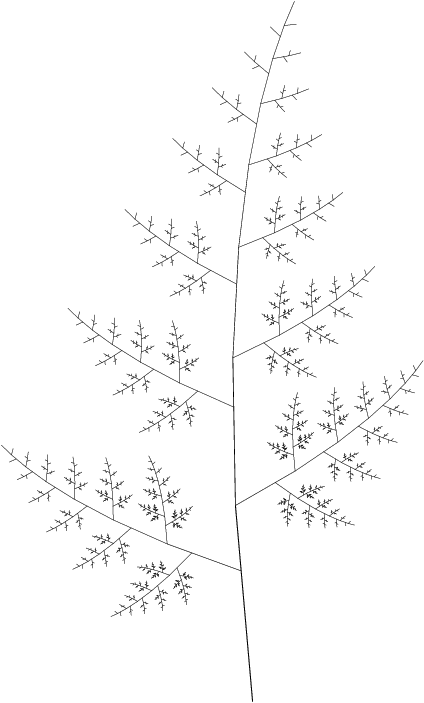

In [1]:
# fractal tree
# contributed by Gerhard Schmid and André Wobst

from pyx import *

# base tree length
l = 5

# base transformations for the left, center, and right part of the tree
ltrafo = trafo.rotate(65).scaled(0.4).translated(0, l * 2.0 / 3.0)
ctrafo = trafo.rotate(-4).scaled(0.75).translated(0, l)
rtrafo = trafo.mirror(90).rotated(-65).scaled(0.35).translated(0, l)

def tree(depth):
    "return transformations for a recursive tree of given depth"
    r = [trafo.rotate(5)]
    if depth > 0:
        subtree = tree(depth - 1)
        r.extend([t*ltrafo for t in subtree])
        r.extend([t*ctrafo for t in subtree])
        r.extend([t*rtrafo for t in subtree])
    return r

c = canvas.canvas()
for t in tree(7):
    # apply the transformation to a "sub"-canvas and insert it into the "main" canvas
    c.insert(canvas.canvas([t])).stroke(path.line(0, 0, 0, l))
    # note that there is a difference when only transforming the line as in:
    # c.stroke(path.line(0, 0, 0, l), [t])
    # The difference is, that the linewidth would not be scaled down.
c